In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [46]:
df=pd.read_csv('economic_index.csv')

In [47]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [48]:
# Drop Unncccessary columns
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [49]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [50]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

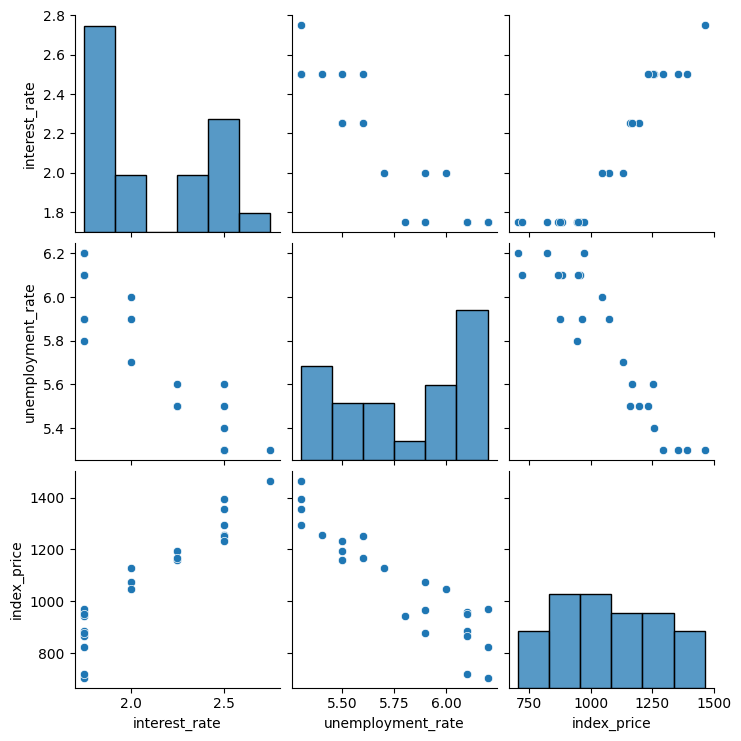

In [51]:
sns.pairplot(df)

Text(0, 0.5, 'unemployment_rate')

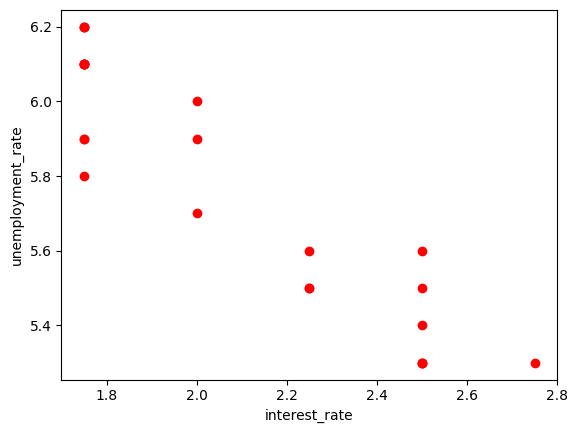

In [52]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

# Independent and Dependent features

In [53]:
# Independent features

# X=df[['interest_rate','unemployment_rate']]
X=df.iloc[:,:-1]

# Dependent features
Y=df.iloc[:,-1]

In [54]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


# Split into training and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

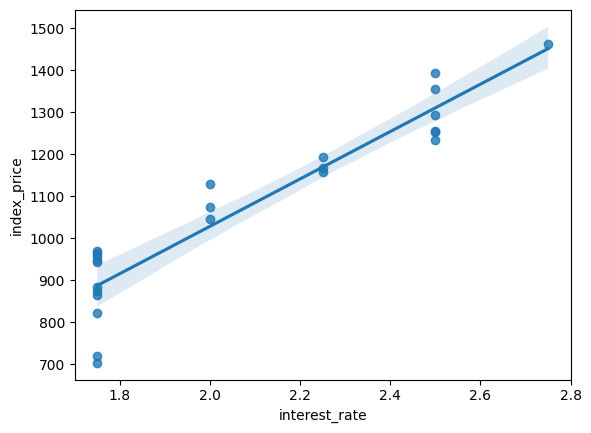

In [57]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

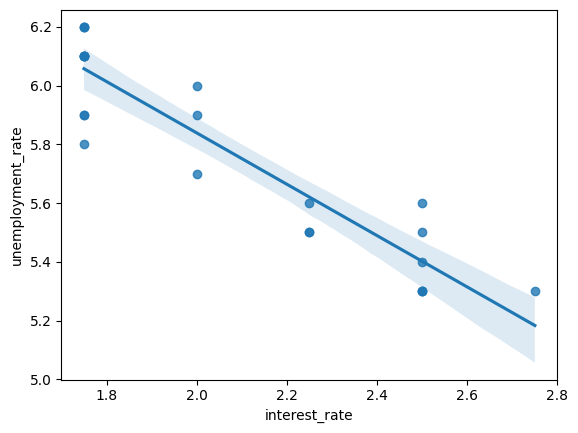

In [58]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

<Axes: xlabel='interest_rate', ylabel='index_price'>

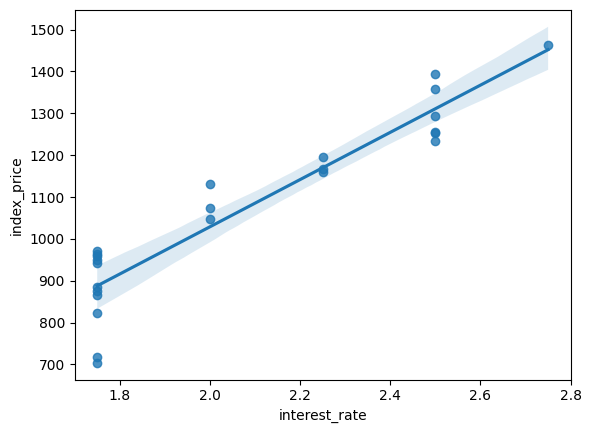

In [59]:
sns.regplot(x='interest_rate', y='index_price', data=df)

# standardization

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [69]:
#cross validation 
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [70]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [71]:
## prediction 
y_pred=regression.predict(x_test)

In [72]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.7628877125835
59.9357815232356
76.11677139574815


In [78]:
from sklearn.metrics import r2_score

In [80]:
#display R-squared 
score=r2_score(y_test, y_pred)
print(score)

0.8278978091457141


In [83]:
#display adjusted R-squared 
print(1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7131630152428567


## Assumptions

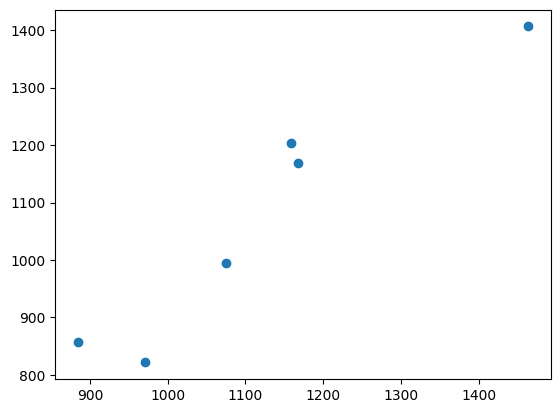

In [85]:
plt.scatter(y_test, y_pred)

### Calculate residuals (difference between actual and predicted values)

In [86]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


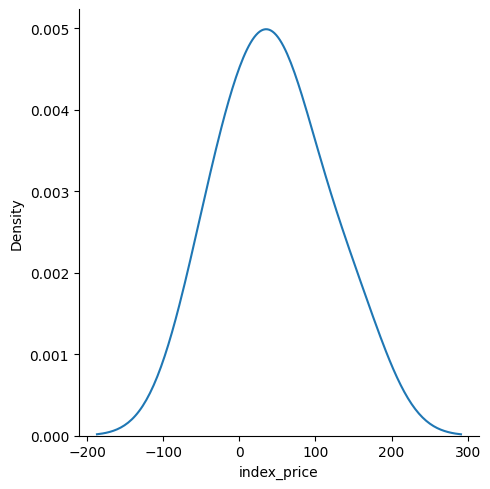

In [87]:
## Plot this residuals
sns.displot(residuals, kind='kde')

In [91]:
print(residuals.mean())

44.47010455035909


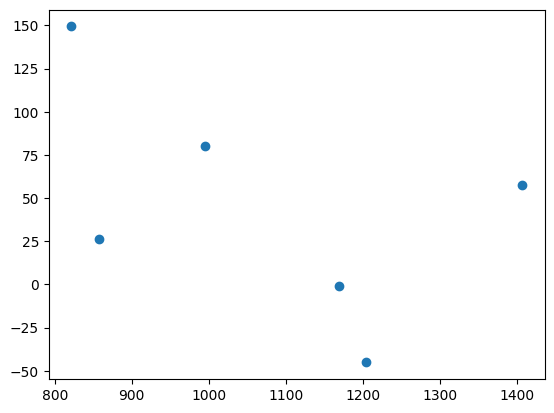

In [88]:
## Scatter Plot with respect to prediction and residulas
plt.scatter(y_pred, residuals)

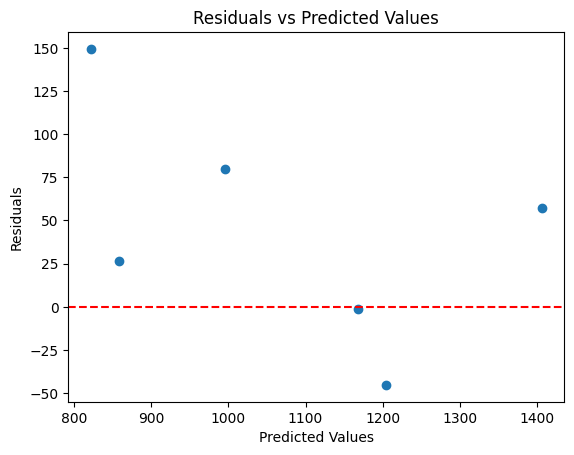

In [89]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [94]:
import statsmodels.api as sm
model=sm.OLS(y_train, x_train).fit()
prediction=model.predict(x_test)
print(prediction)


[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [95]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                       0.754
Time:                        18:54:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/anup/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
